# Importamos todas las librerías que necesitamos

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# from imblearn.over_sampling import SMOTE

# Cargamos los dataset
### Tenemos dos, uno para prueba y uno para entrenamiento

In [143]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [144]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Observemos que éste dataset tiene una columna llamada "transported" que indica si el pasajero sobrevivió al viaje

Ahora, analicemos un poco los **datos** que nos brinda cada dataset

In [145]:
print("Dataset de entrenamiento:",df_train.shape)
print("Dataset de prueba:",df_test.shape)

# (Filas, Columnas)
# Observemos que el dataset de entrenamiento tiene 1 columna más que el de prueba, la columna objetivo (transported)
# Eso es porque nuestro modelo intentará predecir esa columna en el dataset de prueba

Dataset de entrenamiento: (8693, 14)
Dataset de prueba: (4277, 13)


Miremos el .shape de cada dataset por separado, eso nos brindará mas info

In [146]:
print("Dataframe entrenamiento")
print(df_train.info())
print("Dataframe prueba")
print(df_test.info())

Dataframe entrenamiento
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
Dataframe prueba
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13

Como vemos, hay varias columnas que tienen valores Null entre sus filas.\
Pandas nos provee con métodos para checkear si hay valores null (y cuantos)

In [147]:
# Creamos un nuevo dataframe de testing
dft1 = (df_train.isnull().sum()[df_train.isnull().sum()>0]).to_frame().rename(columns={0:"Cantidad de valores Null"})
dft1["Porcentaje de valores Null"] = round(dft1["Cantidad de valores Null"]/df_train.shape[0]*100,2)
dft1 

,Cantidad de valores Null,Porcentaje de valores Null
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


Pandas también nos provee de un método para eliminar filas con valores nulos \
**.dropna()** \
Sin embargo no sería lo más sensato hacer simplemente .dropna() ya que \
estaríamos perdiendo demasiada información

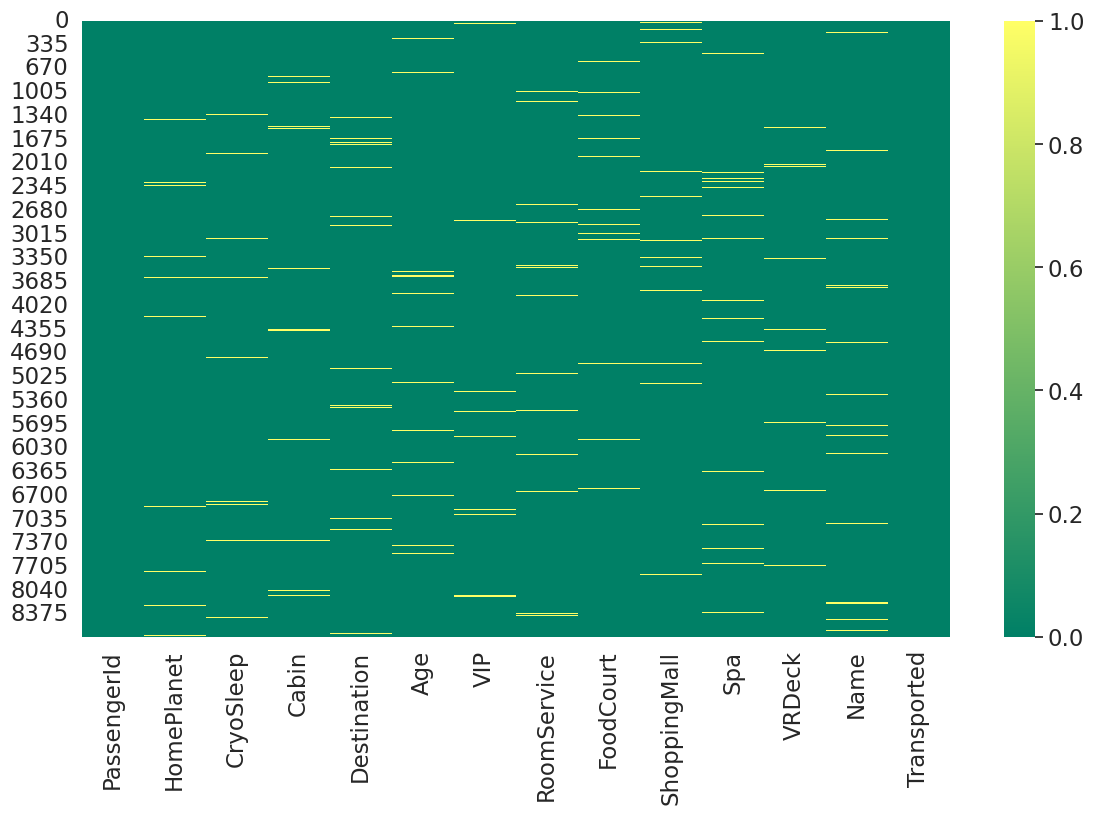

In [148]:
plt.figure(figsize=(14,8))
sns.heatmap(df_train.isnull(), cmap ='summer')
plt.show()

In [149]:
noUsar = df_train.dropna()
print(noUsar.shape,
df_train.shape)

(6606, 14) (8693, 14)


Perdimos 2000 filas! Entonces debemos buscar una forma más sensata de resolver éste problema.

Propuesta : Separemos las columnas de Categoría\
(nombre, planeta de origen, cabin,etc.) de las Numéricas (Edad) \
y tomemos decisiones sobre ellas.

In [150]:
#Me voy a tomar el atrevimiento de eliminar columnas que no nos interesan
cols_a_eliminar = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
df_train_filtrado = df_train.drop(columns=cols_a_eliminar)
df_test_filtrado = df_test.drop(columns=cols_a_eliminar)

Propuesta: \
Sobre las columnas de categoría, vamos a usar **fillna()** para reemplazar\
los valores NaN por un "desconocido".\
Para la columna de Edad, si quisiéramos reemplazar los valores nulos por un número\
arbitrario podríamos inducir un error en nuestro modelo. Entonces es mejor usar **dropna()**. ¿Sería mejor usar el promedio o la mediana en lugar de borrarlos?

In [151]:
#Separamos las columnas categóricas y numéricas
cat_cols = df_train_filtrado.select_dtypes(include=['object', 'bool']).columns.tolist()
if 'Transported' in cat_cols:
    cat_cols.remove('Transported')  # Hacemos ésto para evitar errores más adelante
# Reemplazar los valores nulos en las columnas categóricas

df_train_filtrado[cat_cols] = df_train_filtrado[cat_cols].fillna('Desconocido')
df_test_filtrado[cat_cols] = df_test_filtrado[cat_cols].fillna('Desconocido')

# Eliminar filas con nulos en 'Age'
df_train_limpio = df_train_filtrado.dropna(subset=['Age'])
df_test_limpio = df_test_filtrado.dropna(subset=['Age'])

In [152]:
print(df_train_limpio.isnull().sum())
print(df_test_limpio.isnull().sum()) 


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64
PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
dtype: int64


### Esto es feo, pero lo tenemos que hacer
# Si revisamos el 

### A entrenar
![image info](goku-training-goku-entrenando.gif)

In [153]:
X = df_train_limpio.drop(columns=["Transported"])
y = df_train_limpio[["Transported"]]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [154]:
training_score = []
testing_score = []

In [155]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

In [156]:
model_prediction(LogisticRegression())

NameError: name 'x_train1' is not defined